![irl](https://www.jobvacancyresult.com/storage/company/1976_innomatics.png)

# Laptop Price Prediction

## Name: Mohammad Wasiq

## E-mail: `mohammadwasiq0786@gmail.com`

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('laptop_details.csv')

In [4]:
dataset.head(10)

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,"₹38,990",Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...
7,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,4.1,"₹44,990",AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...


In [9]:
s=dataset['Feature'][0]

In [10]:
print(s)

Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty


In [7]:
df = dataset.copy()

In [8]:
temp = [data.split('Processor')[0] for data in df['Feature']]
df['Feature'] = pd.DataFrame([data.split('Processor')[1] for data in df['Feature']])

In [9]:
df['Processor'] = pd.DataFrame(temp)


In [10]:
dataset['Product'][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [11]:
temp = [data.split('RAM')[0] for data in df['Feature']]

In [12]:
df['RAM'] = pd.DataFrame(temp)

In [13]:
df['Feature']

0       (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...
1       (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...
2       (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...
3      8 GB DDR4 RAM64 bit Windows 10 Operating Syste...
4       (10th Gen)8 GB DDR4 RAMWindows 11 Operating S...
                             ...                        
715    4 GB LPDDR4 RAMChrome Operating System29.46 cm...
716    8 GB DDR4 RAM64 bit Windows 11 Operating Syste...
717    16 GB DDR5 RAM64 bit Windows 11 Operating Syst...
718     (12th Gen)16 GB LPDDR5 RAM64 bit Windows 11 O...
719     (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Oper...
Name: Feature, Length: 720, dtype: object

In [14]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3,(11th Gen)8 GB DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",(11th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3,(11th Gen)8 GB DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",(10th Gen)8 GB DDR4 RAM64 bit Windows 11 Oper...,Intel Core i3,(10th Gen)8 GB DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",8 GB DDR4 RAM64 bit Windows 10 Operating Syste...,AMD Ryzen 5 Hexa Core,8 GB DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",(10th Gen)8 GB DDR4 RAMWindows 11 Operating S...,Intel Core i5,(10th Gen)8 GB DDR4


In [15]:
import re

In [ ]:
# Using regex to extract meaningful data

In [1116]:
# exp = '([A-Za-z0-9 ]*Processor *\([A-Z0-9a-z ]*\))'
# exp = 'Intel|AMD|Qualcomm|Apple'
exp = '(?i)(AMD|Intel|Apple|Qualcomm)[a-z0-9 ]*Processor'
df['Processor'] = dataset.Feature.apply(lambda x: re.search(exp,x).group() if(re.search(exp,x)) else None)

In [1117]:
df['Processor'].isnull().sum()

0

In [1123]:
df.Processor.unique()

array(['Intel Core i3', 'AMD Ryzen 5', 'Intel Core i5',
       'Intel OptaneIntel Core i3', 'AMD Ryzen 7', 'AMD Ryzen 9',
       'Apple M1', 'Intel Celeron', 'AMD Ryzen 3', 'AMD Athlon',
       'Intel Evo Core i5', 'Apple M2', 'Intel Core i7', 'Apple M1 Pro',
       'Qualcomm Snapdragon 7c Gen 2', 'Intel Pentium Silver',
       'Apple M1 Max', 'Intel Core i9', 'Intel Pentium', 'AMD'],
      dtype=object)

In [1119]:
# Remove unnecessary words -> They don't convey much in this case (We could make a different feature for # of cores)
rem_processor = ['Processor', 'Dual Core', 'Quad Core', 'Hexa Core', 'Octa Core']
for string in rem_processor:
    df['Processor'] = df.Processor.str.replace(string,'')
df['Processor'] = df.Processor.str.strip()

In [1120]:
df['Processor']

0      Intel Core i3
1      Intel Core i3
2      Intel Core i3
3        AMD Ryzen 5
4      Intel Core i5
           ...      
715    Intel Celeron
716      AMD Ryzen 7
717      AMD Ryzen 9
718    Intel Core i7
719    Intel Core i5
Name: Processor, Length: 720, dtype: object

In [1130]:
df.Processor.isnull().sum()

0

In [1122]:
# Normally, we can drop these data points, but in this case it is manageable
df.Processor[df.Processor == 'Intel OptaneIntel Core i3']

6      Intel OptaneIntel Core i3
172    Intel OptaneIntel Core i3
Name: Processor, dtype: object

In [1124]:
df.Processor[6] = 'Intel Core i3'
df.Processor[172] = 'Intel Core i3'

In [1125]:
df.Processor[df.Processor == 'Intel Evo Core i5']

53     Intel Evo Core i5
116    Intel Evo Core i5
Name: Processor, dtype: object

In [1126]:
df.Processor[53] = 'Intel Core i5'
df.Processor[116] = 'Intel Core i5'

In [1127]:
df.Processor[df.Processor == 'Intel Pentium Silver']

94     Intel Pentium Silver
235    Intel Pentium Silver
389    Intel Pentium Silver
Name: Processor, dtype: object

In [1128]:
df.Processor[94] = 'Intel Pentium'
df.Processor[235] = 'Intel Pentium'
df.Processor[389] = 'Intel Pentium'

In [1129]:
df.Processor.unique()

array(['Intel Core i3', 'AMD Ryzen 5', 'Intel Core i5', 'AMD Ryzen 7',
       'AMD Ryzen 9', 'Apple M1', 'Intel Celeron', 'AMD Ryzen 3',
       'AMD Athlon', 'Apple M2', 'Intel Core i7', 'Apple M1 Pro',
       'Qualcomm Snapdragon 7c Gen 2', 'Intel Pentium', 'Apple M1 Max',
       'Intel Core i9', 'AMD'], dtype=object)

In [150]:
df.OS.unique()

array(['Windows 11', 'Windows 10', 'Mac OS', 'DOS', 'Chrome'],
      dtype=object)

In [271]:
# RAM
exp = '[0-9]+ GB[ A-Z]*DDR[0-9]+[X]*|[0-9]+ GB Unified'
r = re.compile(exp)
temp_ram=dataset.Feature.apply(lambda x: r.search(x).group(0) if(r.search(x)) else None)

In [272]:
df['RAM'] = pd.DataFrame(temp_ram)

In [273]:
temp_ram.isnull().sum()

0

In [151]:
# OS

exp = 'Mac|DOS|Chrome|Windows'
r = re.compile(exp)
temp_os=dataset.Feature.apply(lambda x: r.search(x).group(0) if(r.search(x)) else None)

Feature    0
dtype: int64

In [154]:
df['OS'] = pd.DataFrame(temp_os)

In [155]:
df.OS

0      Windows
1      Windows
2      Windows
3      Windows
4      Windows
        ...   
715     Chrome
716    Windows
717    Windows
718    Windows
719    Windows
Name: OS, Length: 720, dtype: object

In [156]:
df.head()

,Product,Rating,MRP,Processor,OS,Display,Warranty,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14,2,8,DDR4,SSD,256.0
1,Lenovo,4.2,39990,Intel,Windows,15.6,2,8,DDR4,SSD,512.0
2,ASUS,4.3,32990,Intel,Windows,15.6,1,8,DDR4,SSD,512.0
3,HP,4.4,49990,AMD,Windows,15.6,1,8,DDR4,SSD,512.0
4,ASUS,4.4,49990,Intel,Windows,15.6,1,8,DDR4,SSD,512.0


In [172]:
# HDD
exp = '[0-9]+ [A-Z ]*HDD[\/][0-9]+ [A-Z ]*SSD|[0-9]+ [A-Z ]*HDD|[0-9]+ [A-Z ]*SSD|[0-9]+ [A-Z ]*EMMC'
r = re.compile(exp)
temp_hdd=dataset.Product.apply(lambda x: r.search(x).group(0) if(r.search(x)) else None)

In [34]:
pd.DataFrame(temp_hdd).to_csv('HDD.csv', ',')

In [173]:
df['HDD'] = pd.DataFrame(temp_hdd)

In [161]:
df.head()

,Product,Rating,MRP,Processor,OS,Display,Warranty,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14,2,8,DDR4,SSD,256.0
1,Lenovo,4.2,39990,Intel,Windows,15.6,2,8,DDR4,SSD,512.0
2,ASUS,4.3,32990,Intel,Windows,15.6,1,8,DDR4,SSD,512.0
3,HP,4.4,49990,AMD,Windows,15.6,1,8,DDR4,SSD,512.0
4,ASUS,4.4,49990,Intel,Windows,15.6,1,8,DDR4,SSD,512.0


In [174]:
df.head()

,Product,Rating,MRP,Processor,OS,Display,Warranty,RAM_size,RAM_type,HD_type,HD_size,HDD
0,Lenovo,4.2,36990,Intel,Windows,14,2,8,DDR4,SSD,256.0,256 GB SSD
1,Lenovo,4.2,39990,Intel,Windows,15.6,2,8,DDR4,SSD,512.0,512 GB SSD
2,ASUS,4.3,32990,Intel,Windows,15.6,1,8,DDR4,SSD,512.0,512 GB SSD
3,HP,4.4,49990,AMD,Windows,15.6,1,8,DDR4,SSD,512.0,512 GB SSD
4,ASUS,4.4,49990,Intel,Windows,15.6,1,8,DDR4,SSD,512.0,512 GB SSD


In [206]:
# Display
exp = '[0-9.]+ inch|[0-9.]+ Inch'
r = re.compile(exp)
temp_display=dataset.Feature.apply(lambda x: r.search(x).group(0) if(r.search(x)) else None)

temp_display

In [207]:
temp_display.isnull().sum()

0

In [208]:
df['Display'] = pd.DataFrame(temp_display)

In [209]:
df.Display=df.Display.str.replace('inch', '')
df.Display=df.Display.str.replace('Inch', '')
df.Display=df.Display.str.strip()

In [210]:
df

,Product,Rating,MRP,Processor,OS,Display,Warranty,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14,2,8,DDR4,SSD,256
1,Lenovo,4.2,39990,Intel,Windows,15.6,2,8,DDR4,SSD,512
2,ASUS,4.3,32990,Intel,Windows,15.6,1,8,DDR4,SSD,512
3,HP,4.4,49990,AMD,Windows,15.6,1,8,DDR4,SSD,512
4,ASUS,4.4,49990,Intel,Windows,15.6,1,8,DDR4,SSD,512
...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS,4.0,23490,Intel,Chrome,11.6,1,4,LPDDR4,EMMC,64
716,Lenovo,4.5,73490,AMD,Windows,15.6,1,8,DDR4,SSD,512
717,ASUS,NaN,194990,AMD,Windows,15.6,1,16,DDR5,SSD,1000
718,ASUS,3.0,125990,Intel,Windows,14,1,16,LPDDR5,SSD,512


In [223]:
df

,Product,Rating,MRP,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14,8,DDR4,SSD,256
1,Lenovo,4.2,39990,Intel,Windows,15.6,8,DDR4,SSD,512
2,ASUS,4.3,32990,Intel,Windows,15.6,8,DDR4,SSD,512
3,HP,4.4,49990,AMD,Windows,15.6,8,DDR4,SSD,512
4,ASUS,4.4,49990,Intel,Windows,15.6,8,DDR4,SSD,512
...,...,...,...,...,...,...,...,...,...,...
715,ASUS,4.0,23490,Intel,Chrome,11.6,4,LPDDR4,EMMC,64
716,Lenovo,4.5,73490,AMD,Windows,15.6,8,DDR4,SSD,512
717,ASUS,NaN,194990,AMD,Windows,15.6,16,DDR5,SSD,1000
718,ASUS,3.0,125990,Intel,Windows,14,16,LPDDR5,SSD,512


In [47]:
df.drop(columns=['Feature'], inplace=True)

In [224]:
df

,Product,Rating,MRP,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14,8,DDR4,SSD,256
1,Lenovo,4.2,39990,Intel,Windows,15.6,8,DDR4,SSD,512
2,ASUS,4.3,32990,Intel,Windows,15.6,8,DDR4,SSD,512
3,HP,4.4,49990,AMD,Windows,15.6,8,DDR4,SSD,512
4,ASUS,4.4,49990,Intel,Windows,15.6,8,DDR4,SSD,512
...,...,...,...,...,...,...,...,...,...,...
715,ASUS,4.0,23490,Intel,Chrome,11.6,4,LPDDR4,EMMC,64
716,Lenovo,4.5,73490,AMD,Windows,15.6,8,DDR4,SSD,512
717,ASUS,NaN,194990,AMD,Windows,15.6,16,DDR5,SSD,1000
718,ASUS,3.0,125990,Intel,Windows,14,16,LPDDR5,SSD,512


In [274]:
# Cleaning RAM
df.RAM = pd.DataFrame([data.replace('GB','') for data in df.RAM])

In [280]:
df['RAM_size'] = pd.DataFrame([data.split()[0] for data in df.RAM])

In [281]:
df['RAM_type'] = pd.DataFrame([data.split()[-1] for data in df.RAM])

In [282]:
df.drop(columns='RAM', inplace=True)

In [283]:
df.RAM_type.value_counts()

DDR4       561
DDR5        92
LPDDR4X     37
Unified     12
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: RAM_type, dtype: int64

In [284]:
df

,Product,Rating,MRP,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14.0,8,DDR4,SSD,256
1,Lenovo,4.2,39990,Intel,Windows,15.6,8,DDR4,SSD,512
2,ASUS,4.3,32990,Intel,Windows,15.6,8,DDR4,SSD,512
3,HP,4.4,49990,AMD,Windows,15.6,8,DDR4,SSD,512
4,ASUS,4.4,49990,Intel,Windows,15.6,8,DDR4,SSD,512
...,...,...,...,...,...,...,...,...,...,...
715,ASUS,4.0,23490,Intel,Chrome,11.6,4,LPDDR4,EMMC,64
716,Lenovo,4.5,73490,AMD,Windows,15.6,8,DDR4,SSD,512
717,ASUS,NaN,194990,AMD,Windows,15.6,16,DDR5,SSD,1000
718,ASUS,3.0,125990,Intel,Windows,14.0,16,LPDDR5,SSD,512


In [ ]:
# MRP

In [54]:
df['MRP']=df.MRP.str.replace(u'\u20B9','')
df['MRP']=df.MRP.str.replace(',','')

In [226]:
df

,Product,Rating,MRP,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14,8,DDR4,SSD,256
1,Lenovo,4.2,39990,Intel,Windows,15.6,8,DDR4,SSD,512
2,ASUS,4.3,32990,Intel,Windows,15.6,8,DDR4,SSD,512
3,HP,4.4,49990,AMD,Windows,15.6,8,DDR4,SSD,512
4,ASUS,4.4,49990,Intel,Windows,15.6,8,DDR4,SSD,512
...,...,...,...,...,...,...,...,...,...,...
715,ASUS,4.0,23490,Intel,Chrome,11.6,4,LPDDR4,EMMC,64
716,Lenovo,4.5,73490,AMD,Windows,15.6,8,DDR4,SSD,512
717,ASUS,NaN,194990,AMD,Windows,15.6,16,DDR5,SSD,1000
718,ASUS,3.0,125990,Intel,Windows,14,16,LPDDR5,SSD,512


In [59]:
df.HDD

0               256 GB SSD
1               512 GB SSD
2               512 GB SSD
3               512 GB SSD
4               512 GB SSD
              ...         
715                   None
716             512 GB SSD
717               1 TB SSD
718             512 GB SSD
719    1 TB HDD|256 GB SSD
Name: HDD, Length: 720, dtype: object

In [175]:
# HDD
df.HDD = df.HDD.str.replace('GB', '')
df.HDD

0               256  SSD
1               512  SSD
2               512  SSD
3               512  SSD
4               512  SSD
             ...        
715             64  EMMC
716             512  SSD
717             1 TB SSD
718             512  SSD
719    1 TB HDD/256  SSD
Name: HDD, Length: 720, dtype: object

In [176]:
df.HDD = df.HDD.str.replace('TB', '')

In [177]:
df.HDD

0             256  SSD
1             512  SSD
2             512  SSD
3             512  SSD
4             512  SSD
            ...       
715           64  EMMC
716           512  SSD
717             1  SSD
718           512  SSD
719    1  HDD/256  SSD
Name: HDD, Length: 720, dtype: object

In [178]:
exp = "[0-9 ]+SSD|[0-9 ]+EMMC"
# r = re.compile(exp)
temp_ssd=df.HDD.apply(lambda x: re.search(exp,str(x)).group() if(re.search(exp,str(x))) else None)

In [179]:
df['temp_ssd'] = pd.DataFrame(temp_ssd)

In [180]:
exp = "[0-9 ]+HDD"
# r = re.compile(exp)
temp_hdd=df.HDD.apply(lambda x: re.search(exp,str(x)).group() if(re.search(exp,str(x))) else None)

In [181]:
temp_hdd.isnull().sum()

672

In [182]:
df['temp_hdd'] = pd.DataFrame(temp_hdd)

In [183]:
temp_type = []
for data in df.HDD:
    if data:
        if ('HDD' in data) and ('SSD' in data):
            temp_type.append("Hybrid")
        elif ('HDD' in data) and ('SSD' not in data):
            temp_type.append("HDD")
        elif ('HDD' not in data) and ('SSD' in data):
            temp_type.append("SSD")
        else:
            temp_type.append("EMMC")
    else:
           temp_type.append(None)

In [185]:
df['HD_type'] = pd.DataFrame(temp_type)

In [186]:
df.temp_ssd

0      256  SSD
1      512  SSD
2      512  SSD
3      512  SSD
4      512  SSD
         ...   
715    64  EMMC
716    512  SSD
717      1  SSD
718    512  SSD
719    256  SSD
Name: temp_ssd, Length: 720, dtype: object

In [187]:
df.temp_ssd = df.temp_ssd.str.replace('SSD','')
df.temp_ssd = df.temp_ssd.str.replace('EMMC','')
df.temp_hdd = df.temp_hdd.str.replace('HDD','')
df.temp_ssd = df.temp_ssd.str.strip()
df.temp_hdd = df.temp_hdd.str.strip()

In [188]:
hdd_size = []
for data in df.temp_hdd:
    if data:
        if len(data)>1:
            hdd_size.append(data)
        else:
            hdd_size.append(str(1000 * int(data)))
    else:
        hdd_size.append(None)

In [189]:
pd.DataFrame(hdd_size).isnull().sum()

0    672
dtype: int64

In [190]:
df.temp_hdd = pd.DataFrame(hdd_size)

In [191]:

df.temp_ssd

0      256
1      512
2      512
3      512
4      512
      ... 
715     64
716    512
717      1
718    512
719    256
Name: temp_ssd, Length: 720, dtype: object

In [192]:
ssd_size = []
for data in df.temp_ssd:
    if data:
        if len(data)>1:
            ssd_size.append(data)
        else:
            ssd_size.append(str(1000 * int(data)))
    else:
        ssd_size.append(None)

In [193]:
df.temp_ssd = pd.DataFrame(ssd_size)

In [194]:
HD_size = []
for s1, s2 in zip(df.temp_ssd, df.temp_hdd):
    if s1 or s2:
        if s1 and s2:
            HD_size.append(int(s1)+int(s2))
        elif s1 and not s2:
            HD_size.append(int(s1))
        elif not s1 and s2:
            HD_size.append(int(s2))
    else:
        HD_size.append(None)

In [195]:
df['HD_size'] = pd.DataFrame(HD_size)

In [196]:
df.head()

,Product,Rating,MRP,Processor,OS,Display,Warranty,RAM_size,RAM_type,HD_type,HD_size,HDD,temp_ssd,temp_hdd
0,Lenovo,4.2,36990,Intel,Windows,14,2,8,DDR4,SSD,256,256 SSD,256,None
1,Lenovo,4.2,39990,Intel,Windows,15.6,2,8,DDR4,SSD,512,512 SSD,512,None
2,ASUS,4.3,32990,Intel,Windows,15.6,1,8,DDR4,SSD,512,512 SSD,512,None
3,HP,4.4,49990,AMD,Windows,15.6,1,8,DDR4,SSD,512,512 SSD,512,None
4,ASUS,4.4,49990,Intel,Windows,15.6,1,8,DDR4,SSD,512,512 SSD,512,None


In [197]:
# Now, drop temp_ssd and temp_hdd
df.drop(columns=['temp_ssd', 'temp_hdd'], inplace=True)

In [198]:
# Drop HDD column as well
df.drop(columns=['HDD'], inplace=True)

In [227]:
df.head()

,Product,Rating,MRP,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14,8,DDR4,SSD,256
1,Lenovo,4.2,39990,Intel,Windows,15.6,8,DDR4,SSD,512
2,ASUS,4.3,32990,Intel,Windows,15.6,8,DDR4,SSD,512
3,HP,4.4,49990,AMD,Windows,15.6,8,DDR4,SSD,512
4,ASUS,4.4,49990,Intel,Windows,15.6,8,DDR4,SSD,512


In [101]:
df['Product'] = pd.DataFrame([data.split()[0] for data in df.Product])

In [102]:
df.Product=df.Product.str.strip()

In [228]:
df.head()

,Product,Rating,MRP,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,Lenovo,4.2,36990,Intel,Windows,14,8,DDR4,SSD,256
1,Lenovo,4.2,39990,Intel,Windows,15.6,8,DDR4,SSD,512
2,ASUS,4.3,32990,Intel,Windows,15.6,8,DDR4,SSD,512
3,HP,4.4,49990,AMD,Windows,15.6,8,DDR4,SSD,512
4,ASUS,4.4,49990,Intel,Windows,15.6,8,DDR4,SSD,512


In [104]:
df.Product.unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [467]:
# Rating
df.Rating.isnull().sum()

139

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Processor  720 non-null    object 
 4   OS         720 non-null    object 
 5   Display    720 non-null    object 
 6   RAM_size   720 non-null    object 
 7   RAM_type   720 non-null    object 
 8   HD_type    720 non-null    object 
 9   HD_size    720 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 56.4+ KB


In [291]:
convert_type = {
    'MRP': int,
    'Display':float,
    'RAM_size':int,
    'HD_size':int
}
df = df.astype(convert_type)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    int32  
 3   Processor  720 non-null    object 
 4   OS         720 non-null    object 
 5   Display    720 non-null    float64
 6   RAM_size   720 non-null    int32  
 7   RAM_type   720 non-null    object 
 8   HD_type    720 non-null    object 
 9   HD_size    720 non-null    int32  
dtypes: float64(2), int32(3), object(5)
memory usage: 47.9+ KB


In [403]:
df.RAM_type.isnull().sum()

0

In [ ]:
# 

In [236]:

# df.to_csv('LaptopDetailsClean.csv',',')

In [166]:
# Question
# Average rating based on product

<AxesSubplot:ylabel='Product'>

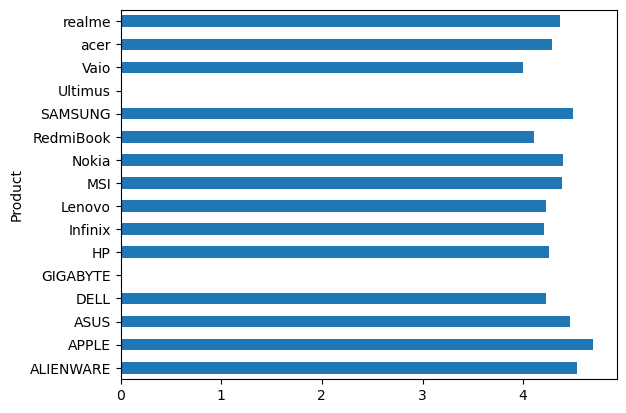

In [169]:
df.groupby('Product')['Rating'].mean().plot(kind='barh')

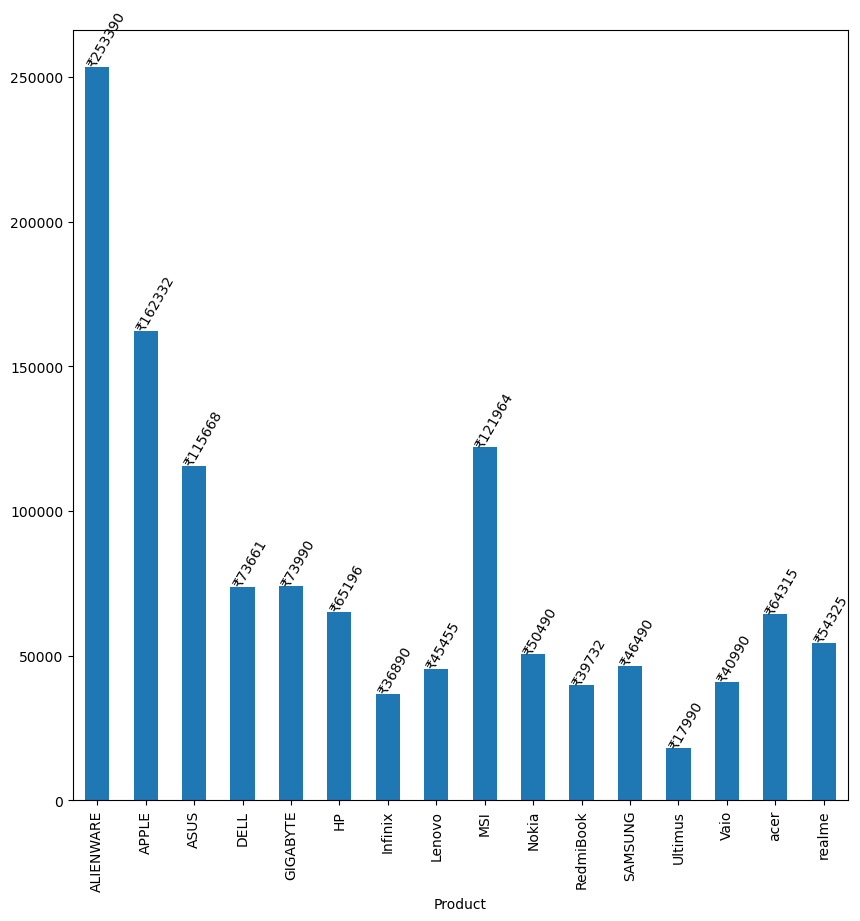

In [257]:
# Average price based on the product type
ax = df.groupby('Product')['MRP'].mean().plot(kind='bar', figsize=(10,10))
for p in ax.patches:
    ax.annotate(u'\u20B9{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+3), rotation=60)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    int32  
 3   Processor  720 non-null    object 
 4   OS         720 non-null    object 
 5   Display    720 non-null    float64
 6   RAM_size   720 non-null    int32  
 7   RAM_type   720 non-null    object 
 8   HD_type    720 non-null    object 
 9   HD_size    720 non-null    int32  
dtypes: float64(2), int32(3), object(5)
memory usage: 47.9+ KB


In [313]:
# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features

['Rating', 'MRP', 'Display', 'RAM_size', 'HD_size']

In [314]:
categorical_features = [feature for feature in df.columns if(df[feature].dtypes=='O')]
categorical_features

['Product', 'Processor', 'OS', 'RAM_type', 'HD_type']

In [1669]:
# Manually managing an outlier
df.Display[df.Display > 50]

688    206015.6
Name: Display, dtype: float64

In [1670]:
# Replacing it with a correct value
df.Display[688] = 15.6

In [315]:
# Univariate Analysis of Numerical Features


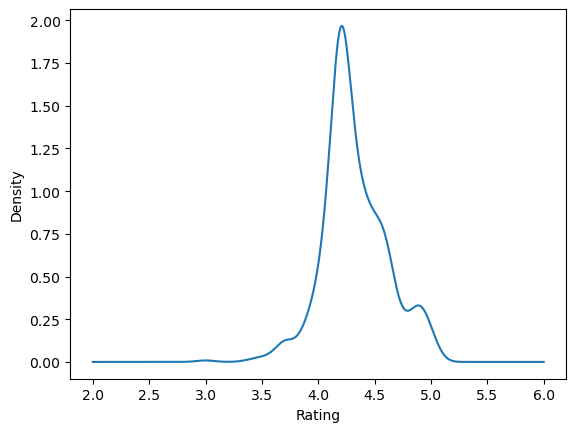

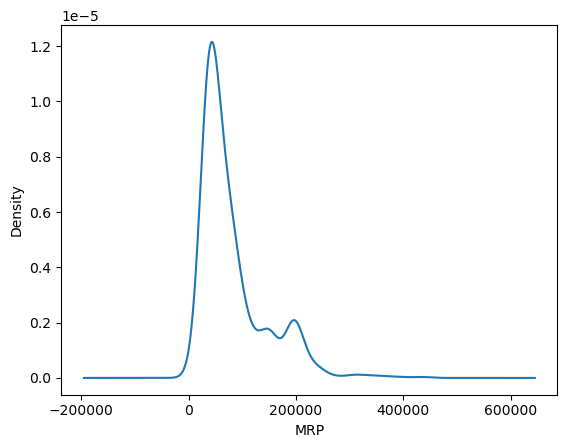

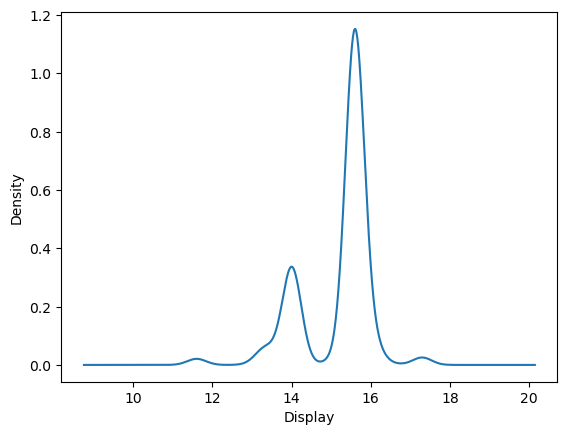

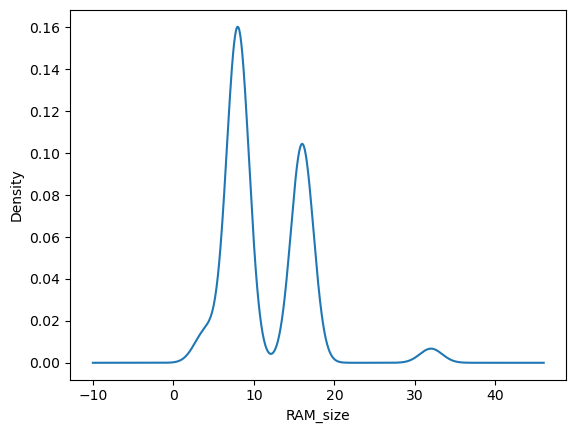

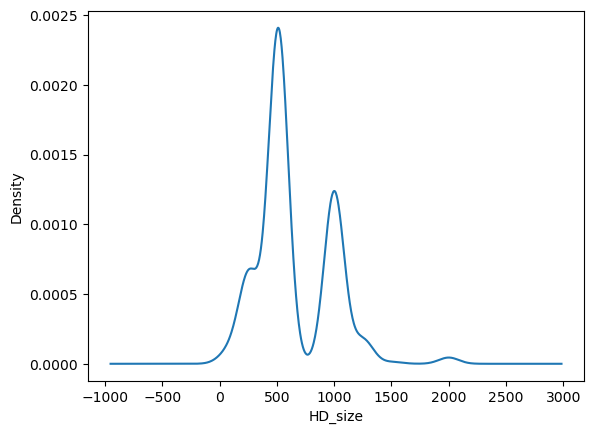

In [1671]:
# plt.figure(figsize=(15,15))
for i in range(0, len(numerical_features)):        
    df[numerical_features[i]].plot(kind='kde')
    plt.xlabel(numerical_features[i])
    plt.show()


### There is some skewness in all of the numerical features

In [ ]:
# We can see some outliers, but we can't afford to lose any data. I'll use the log transformation to reduce the skewness later

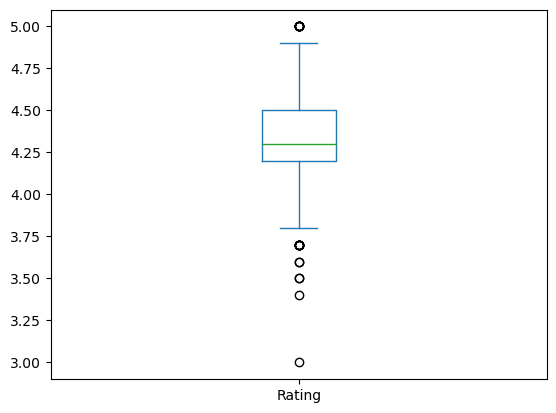

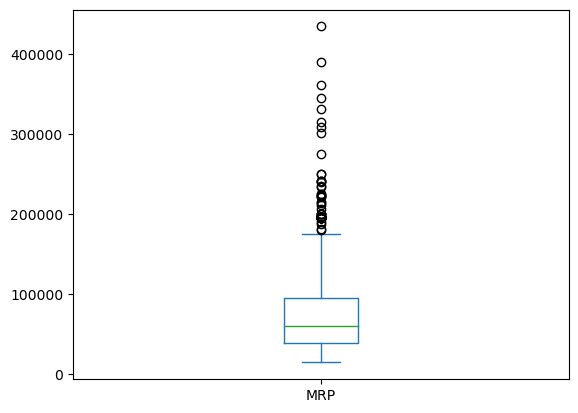

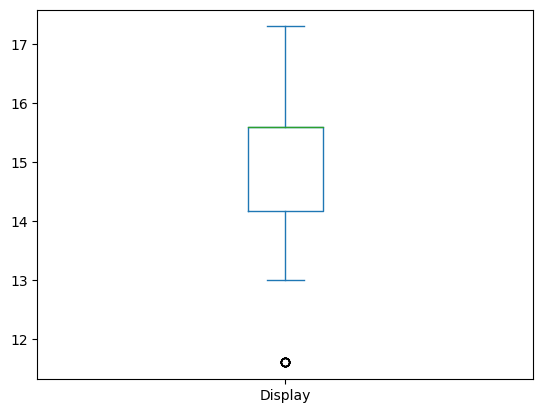

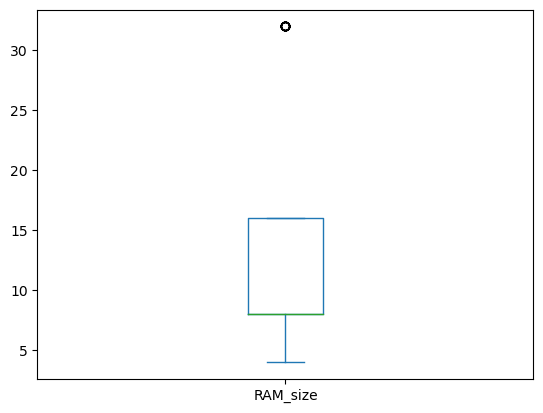

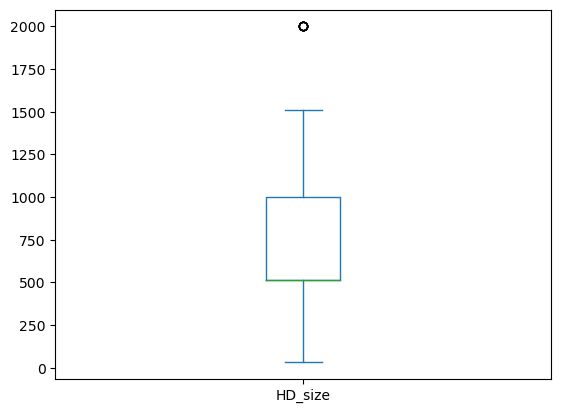

In [1672]:
# Let's check for the outliers
for i in range(0, len(numerical_features)):        
    df[numerical_features[i]].plot(kind='box')
    plt.show()

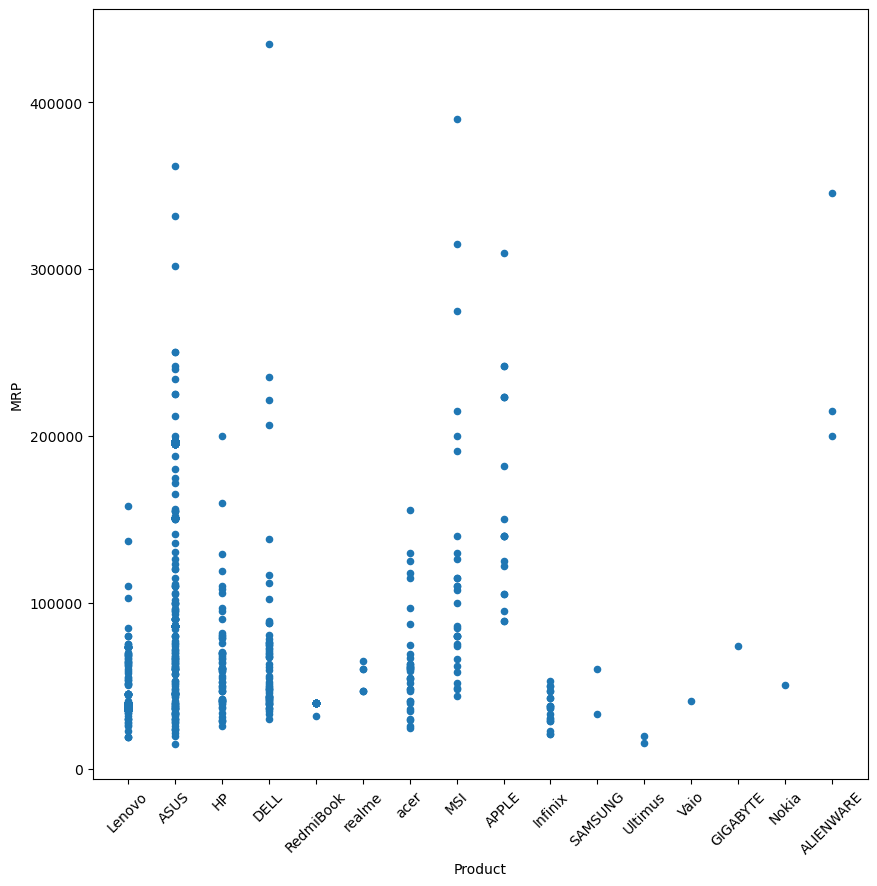

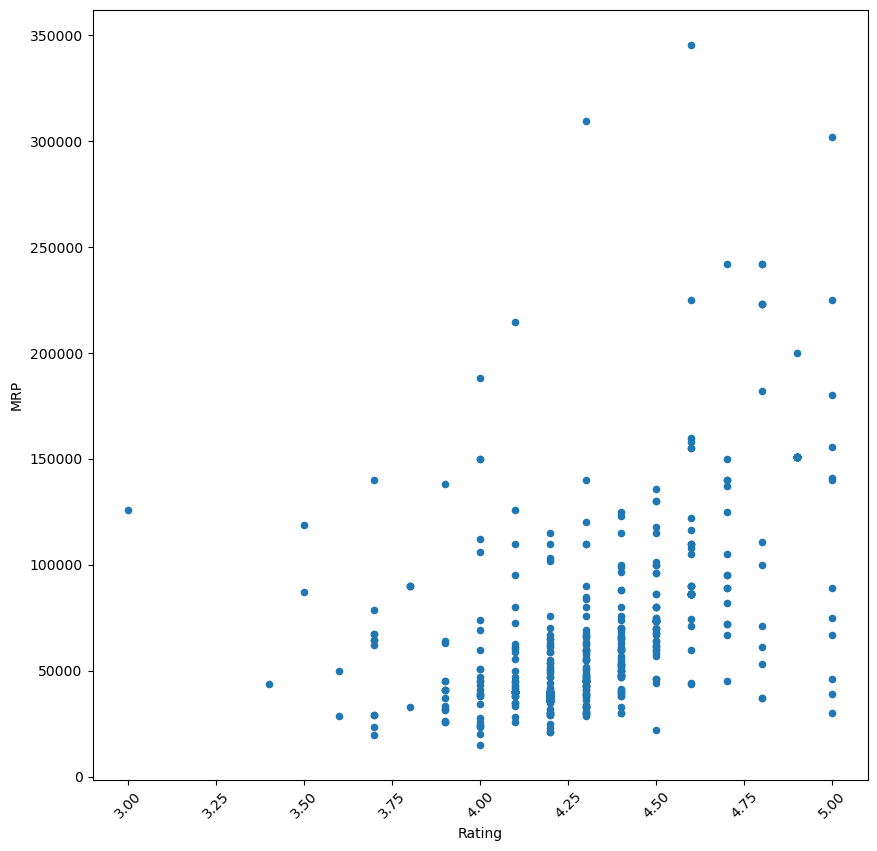

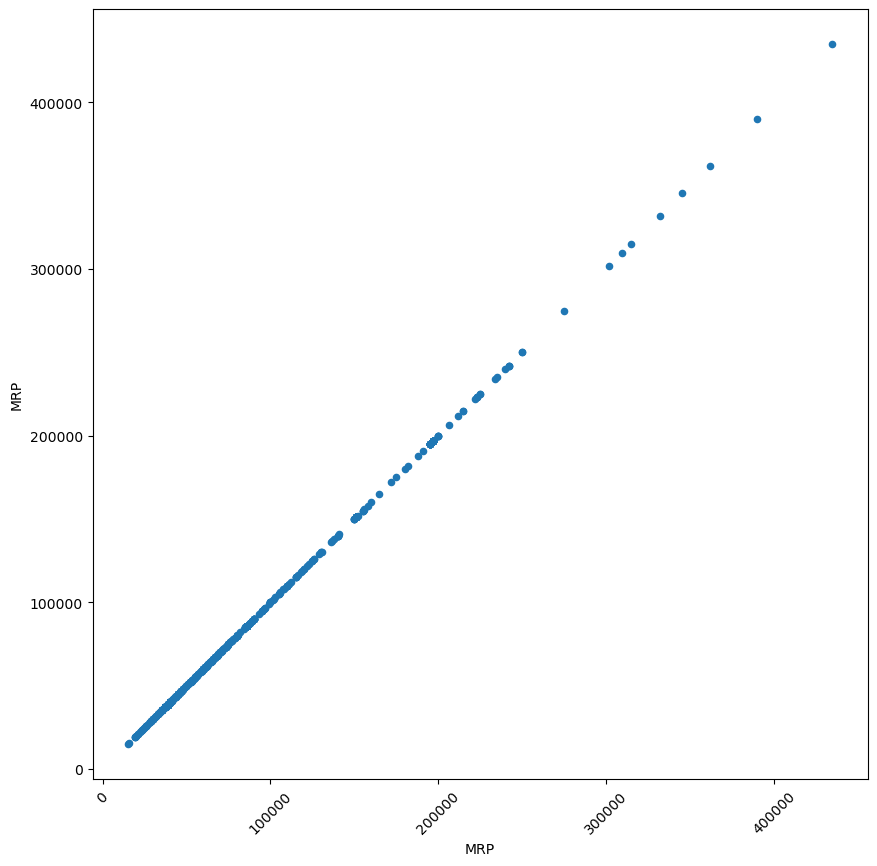

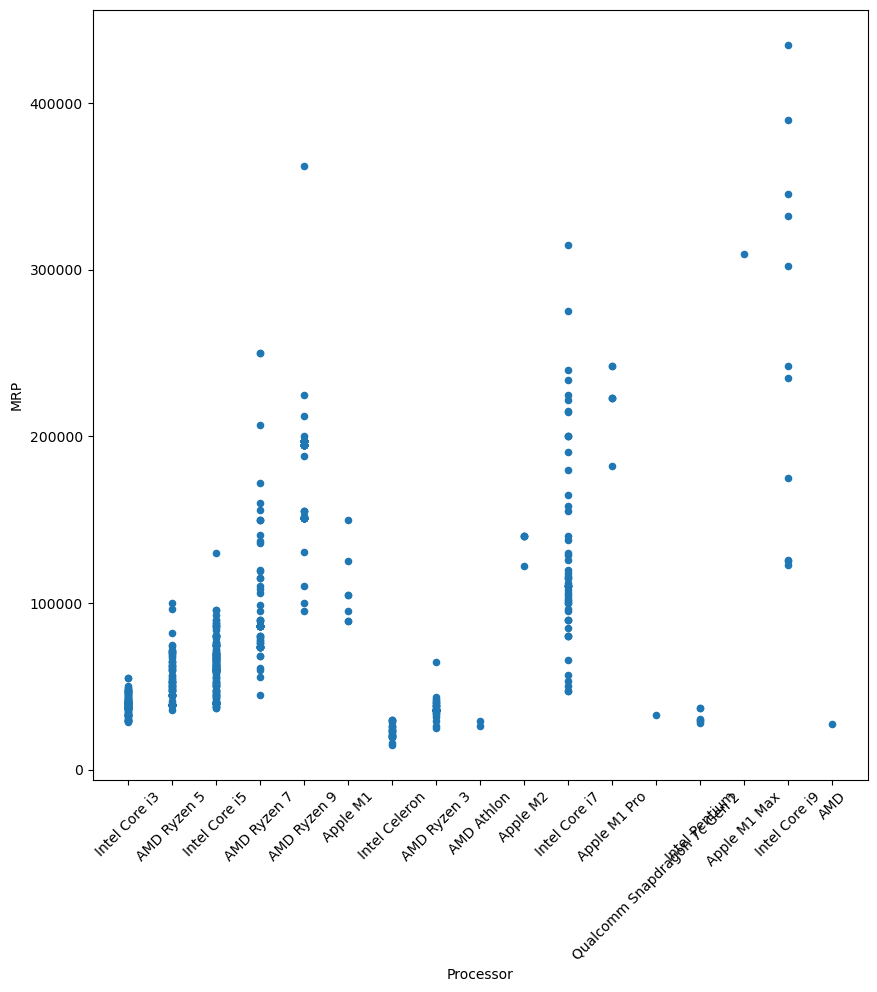

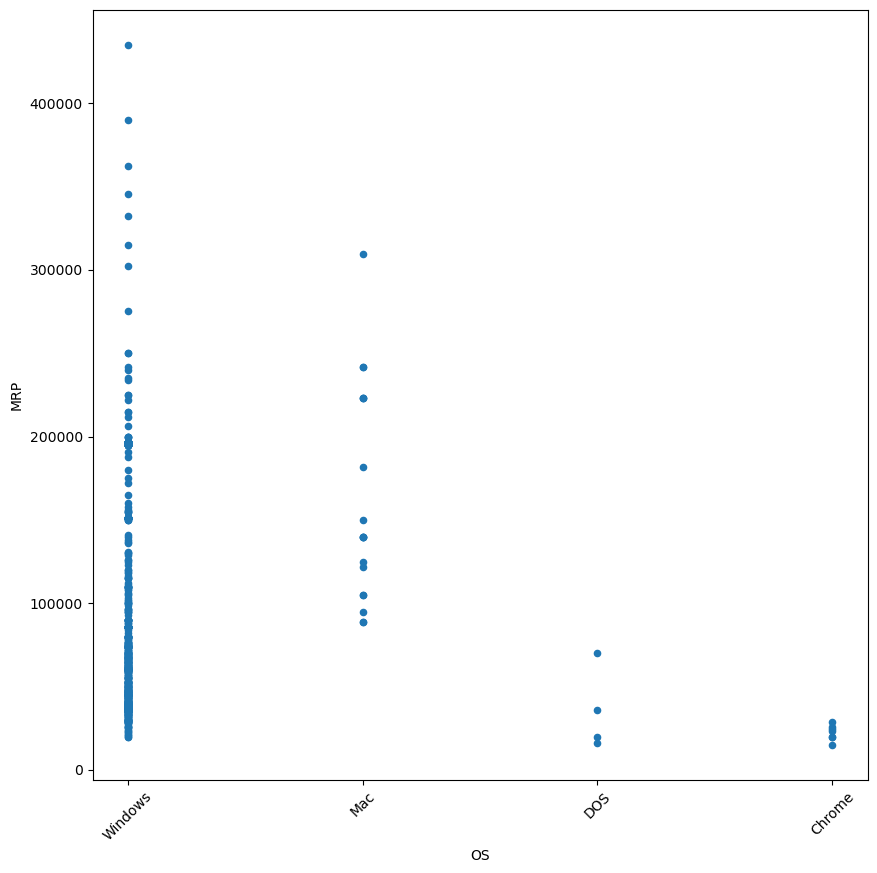

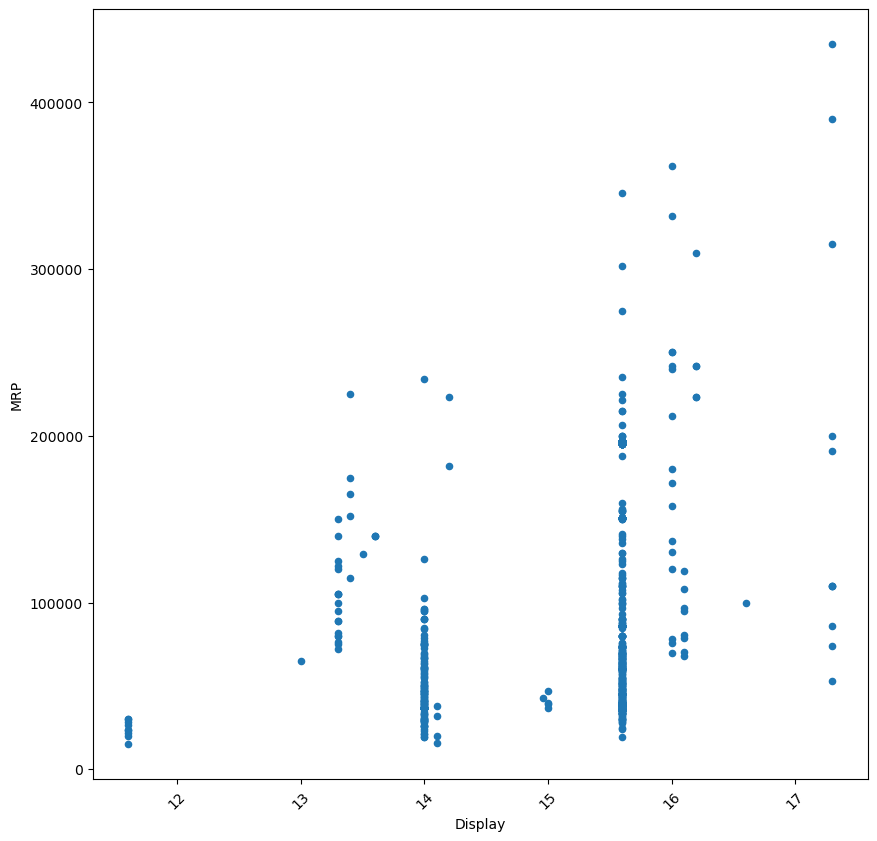

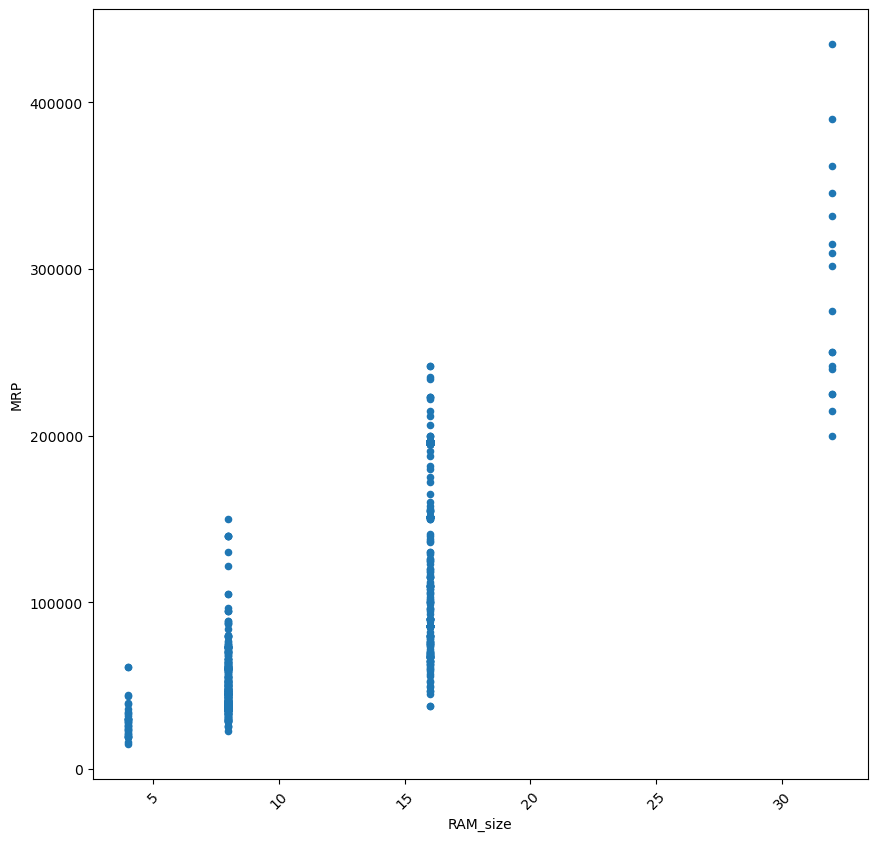

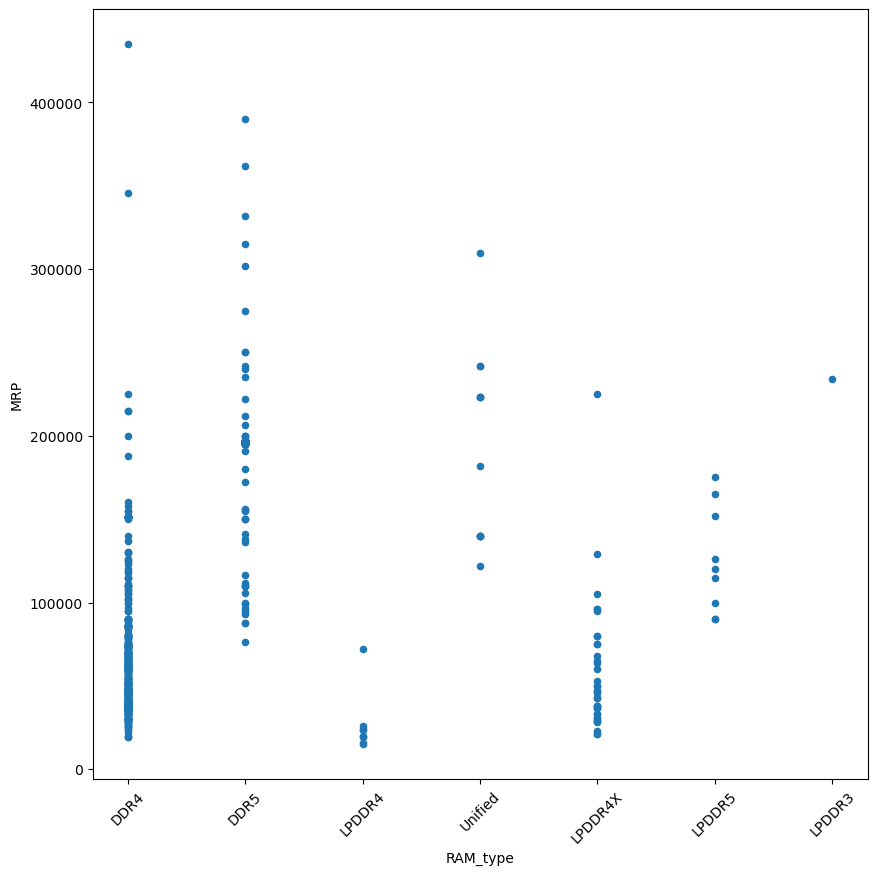

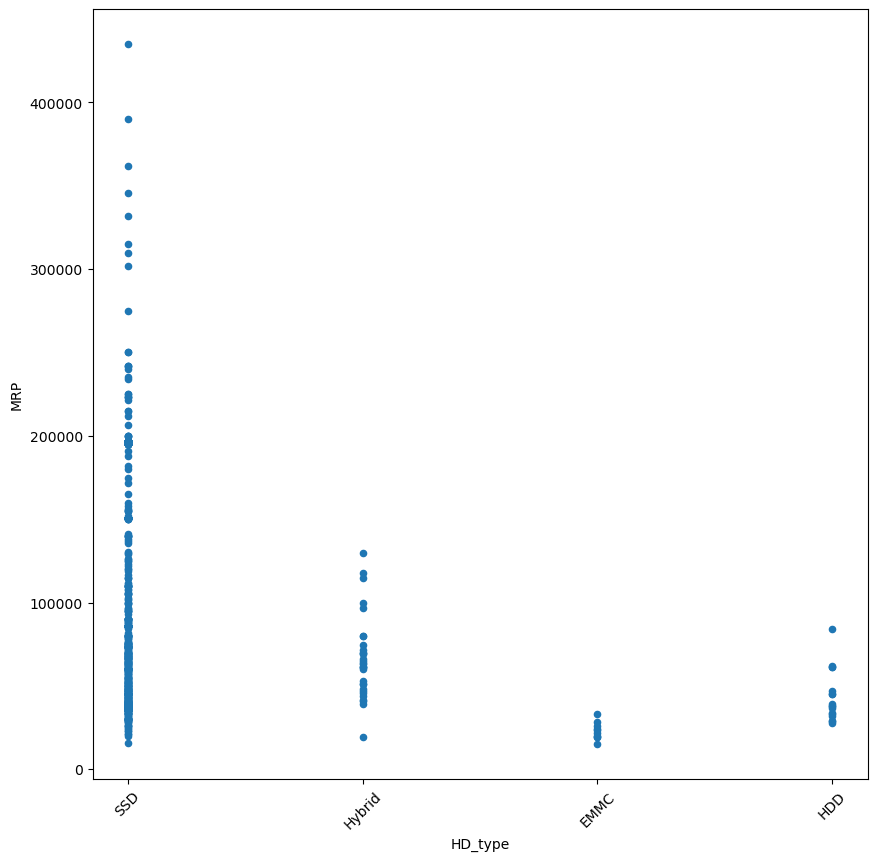

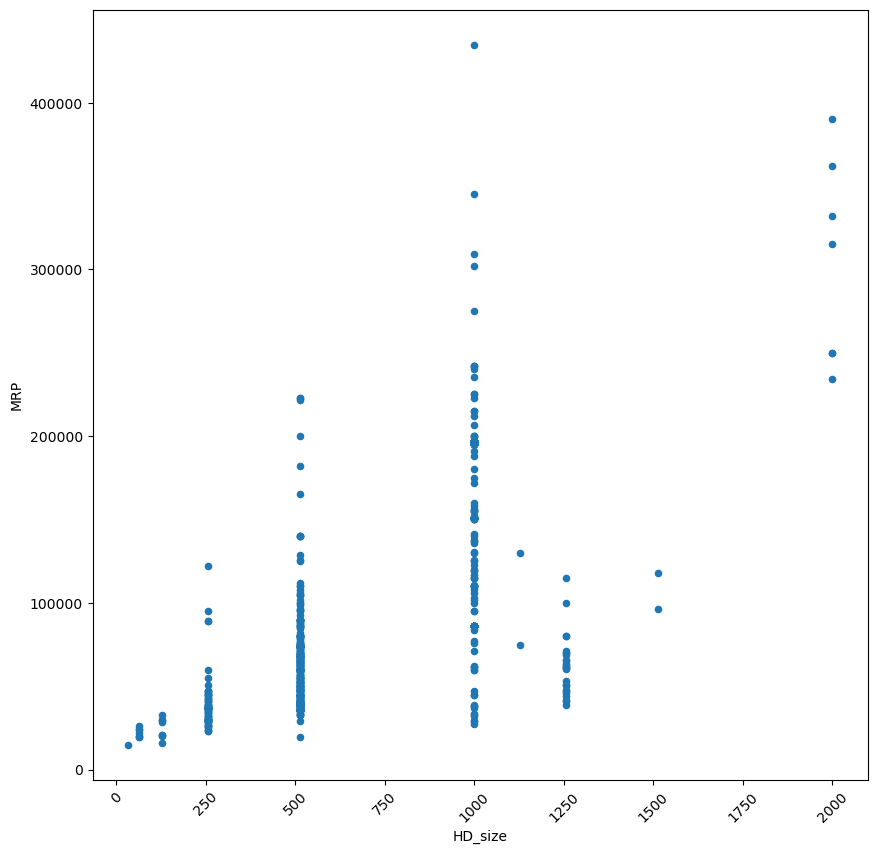

In [1673]:
for feature in df.columns:
    df.plot(kind='scatter', x=feature, y= 'MRP', figsize=(10,10))
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# RAM size and HD size has a positive relationship with the price of a laptop
# The processor type, HD type, RAM type do matter, but as the price is dependent on other specifications that's why we don't see a clear trend with price of a laptop
# brand is also a deciding factor, some brands focus on budget laptops, some target the specific group of community, others have a wide range of laptops
# no. of cores, GPU, Graphics etc. have not been considered in the dataset which also play a crucial role for deciding the price

In [2009]:
# For further operations, let's copy the clean data into a new dataframe
df2 = df.copy()

In [2010]:
df2.HD_type[df2.HD_type==0]

Series([], Name: HD_type, dtype: object)

In [1861]:
# Don't require to log transform discrete features
# #Log Transform Features
# for feature in ['HD_size', 'RAM_size', 'Display']:
#     df2[feature] = np.log(df2[feature])

<AxesSubplot:ylabel='Density'>

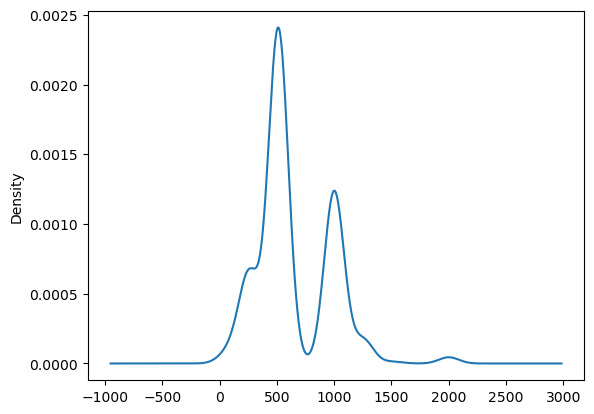

In [2011]:
df2['HD_size'].plot(kind='kde')

In [2012]:
# Performing ordinal encoding on HD_type -> Laptops having Hybrid(HDD + SDD) are ranked highest.
HD_type_endict = {'HDD':1,
                  'EMMC':1.5,
                  'SSD':2,
                  'Hybrid':3}
df2['HD_type'] = df2.HD_type.map(HD_type_endict)

In [2013]:
df.HD_type.isnull().sum()

0

In [2014]:
df2.HD_type

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
715    1.5
716    2.0
717    2.0
718    2.0
719    3.0
Name: HD_type, Length: 720, dtype: float64

In [2015]:
df2.RAM_type.unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified', 'LPDDR4X', 'LPDDR5', 'LPDDR3'],
      dtype=object)

In [2016]:
df2.RAM_type.isnull().sum()

0

In [2017]:
# Ordinal encoding of RAM type
RAM_type_endict = {'LPDDR3':1,
                   'DDR4':2, 'LPDDR4':2, 'LPDDR4X':2,
                   'DDR5':3, 'LPDDR5':3,
                   'Unified':4
                  }
df2['RAM_type'] = df.RAM_type.map(RAM_type_endict)

In [2018]:
df2.RAM_type

0      2
1      2
2      2
3      2
4      2
      ..
715    2
716    2
717    3
718    3
719    2
Name: RAM_type, Length: 720, dtype: int64

In [2019]:
# Drop rating column
df2.drop(columns='Rating', inplace=True)

In [2020]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   MRP        720 non-null    int32  
 2   Processor  720 non-null    object 
 3   OS         720 non-null    object 
 4   Display    720 non-null    float64
 5   RAM_size   720 non-null    int32  
 6   RAM_type   720 non-null    int64  
 7   HD_type    720 non-null    float64
 8   HD_size    720 non-null    int32  
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 42.3+ KB


In [2021]:
# Below graph does not show any relation with the type of RAM. Determining the price of a laptop is complex in itself, there are numerous features to consider.

<AxesSubplot:xlabel='RAM_type', ylabel='MRP'>

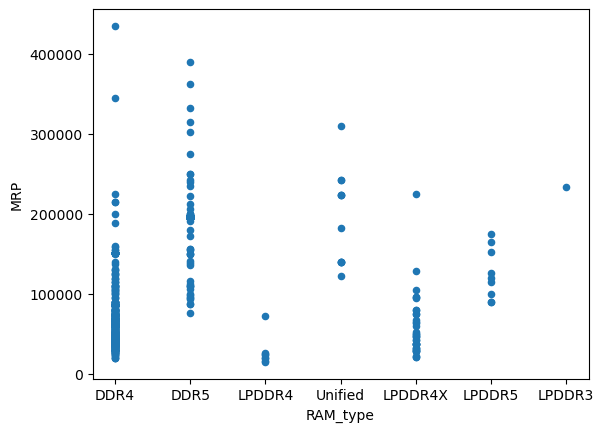

In [2022]:
df.plot(kind='scatter', x='RAM_type', y='MRP')


In [2023]:
df.HD_type.unique()

array(['SSD', 'Hybrid', 'EMMC', 'HDD'], dtype=object)

<AxesSubplot:ylabel='Density'>

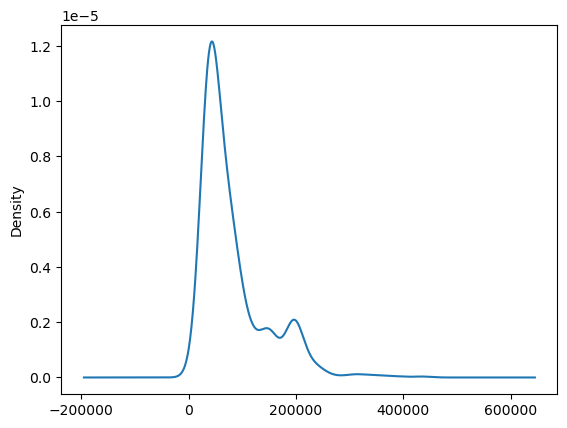

In [2024]:
df['MRP'].plot(kind='kde')

In [2025]:
#Applying log transformation
df2['MRP']=np.log(df2.MRP)

In [2026]:
## Log transformation has evidently normalized the MRP feature to some extent

<AxesSubplot:ylabel='Density'>

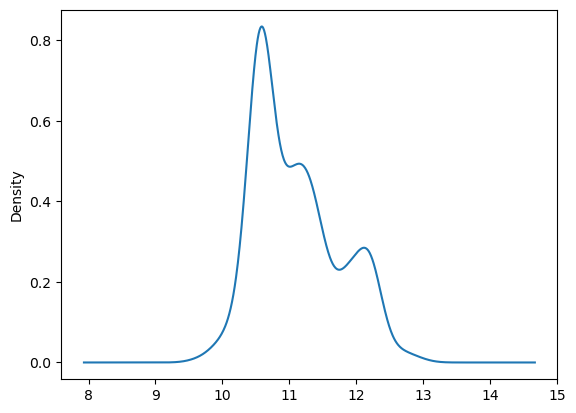

In [2027]:
df2['MRP'].plot(kind='kde')

In [2028]:
y = df2['MRP']
df2.drop(columns=['MRP'], inplace=True)

In [2029]:
df2.Processor.unique()

array(['Intel Core i3', 'AMD Ryzen 5', 'Intel Core i5', 'AMD Ryzen 7',
       'AMD Ryzen 9', 'Apple M1', 'Intel Celeron', 'AMD Ryzen 3',
       'AMD Athlon', 'Apple M2', 'Intel Core i7', 'Apple M1 Pro',
       'Qualcomm Snapdragon 7c Gen 2', 'Intel Pentium', 'Apple M1 Max',
       'Intel Core i9', 'AMD'], dtype=object)

# Using below encoding techniques, I was able to increase the accuracy of both linear regression and SVR by about 8-9%

### The mapping is done based on the price not the performance. 
#### This may or may not comply with the mapping based on the performance

In [2030]:
# # df2.drop(columns=['Product'], inplace=True)
# processor_endict = {'Qualcomm':1,
#                     'AMD':2,
#                     'Intel':3,
#                     'Apple':4
# }
processor_endict = {'Qualcomm Snapdragon 7c Gen 2':1, 'Intel Pentium':1, 'Intel Celeron':1, 'AMD':1, 'AMD Athlon':1,
                   'Intel Core i3':2, 'AMD Ryzen 3':2,
                   'Intel Core i5':3, 'AMD Ryzen 5':3,
                   'Intel Core i7':4, 'AMD Ryzen 7':4,
                   'Intel Core i9':5, 'AMD Ryzen 9':5,
                   'Apple M1':6, 'Apple M1 Max':6, 'Apple M1 Pro':6,
                   'Apple M2':7}
df2['Processor'] = df2.Processor.map(processor_endict)

In [2031]:
product_endict = {'Ultimus':1, 'Infinix':1,
                 'Lenovo':2, 'ASUS':2, 'realme':2,'acer':2,'RedmiBook':2, 'Vaio':2, 'Nokia':2,
                 'GIGABYTE':2,'MSI':2, 'HP':2, 'DELL':2, 'SAMSUNG':2,
                 'ALIENWARE':3, 'APPLE':3}
df2['Product'] = df2.Product.map(product_endict)

In [2032]:
df2.Product.unique()

array([2, 3, 1], dtype=int64)

# Train Test Split

In [2033]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=36)

In [2034]:
# Label encoding Categorical variables
# encode_product = LabelEncoder()
encode_os = LabelEncoder()
# encode_processor = LabelEncoder()

In [2035]:
# X_train['Product'] = encode_product.fit_transform(X_train['Product'])
X_train['OS'] = encode_os.fit_transform(X_train['OS'])
# X_train['Processor'] = encode_processor.fit_transform(X_train['Processor'])

In [2036]:
# X_test['Product'] = encode_product.transform(X_test['Product'])
X_test['OS'] = encode_os.transform(X_test['OS'])
# X_test['Processor'] = encode_processor.transform(X_test['Processor'])

In [2037]:
X_test

,Product,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
547,2,2,3,15.6,8,2,2.0,512
27,2,5,3,15.6,16,3,2.0,1000
180,2,3,3,15.6,8,2,2.0,512
620,2,4,3,15.6,8,2,2.0,512
183,1,1,3,14.0,4,2,2.0,128
...,...,...,...,...,...,...,...,...
690,2,5,3,15.6,16,2,2.0,1000
114,2,2,3,15.6,8,2,2.0,256
711,2,5,3,15.6,16,2,2.0,1000
360,2,2,3,14.0,8,2,2.0,256


In [2038]:
# Scaling should be performed after splitting to avoid any data leakage

In [2039]:
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0,1))


In [2040]:
X_train.columns

Index(['Product', 'Processor', 'OS', 'Display', 'RAM_size', 'RAM_type',
       'HD_type', 'HD_size'],
      dtype='object')

In [2041]:
scaled_features = X_train.columns
X_train[scaled_features] = scaler.fit_transform(X_train[scaled_features].values)
X_test[scaled_features] = scaler.transform(X_test[scaled_features].values)

In [2042]:
# 
y_scaler = StandardScaler()
# y_train = pd.DataFrame(y_train)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train.columns=['MRP']
y_test.columns=['MRP']

In [2043]:
# Correlation of features with target variable
for feature in X_train.columns:
    print(feature, X_train[feature].corr(y_train['MRP']))

Product 0.17044606987967514
Processor 0.1141370361924698
OS -0.11153482314944725
Display 0.040751688265369526
RAM_size 0.020655181913795787
RAM_type 0.06869316407358284
HD_type -0.022699256792944225
HD_size 0.0395517840037203


In [2044]:
X_train

,Product,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
15,0.5,0.666667,1.0,0.701754,0.428571,0.666667,0.50,0.491870
71,0.5,0.333333,1.0,0.701754,0.142857,0.333333,0.50,0.243902
345,0.5,0.000000,0.0,0.000000,0.000000,0.333333,0.25,0.000000
178,0.5,0.166667,1.0,0.701754,0.142857,0.333333,0.50,0.243902
454,0.5,0.333333,1.0,0.421053,0.142857,0.333333,0.50,0.113821
...,...,...,...,...,...,...,...,...
649,0.5,0.500000,1.0,0.298246,0.428571,0.666667,0.50,0.491870
250,0.5,0.500000,1.0,0.701754,0.428571,0.333333,0.50,0.491870
161,0.5,0.666667,1.0,0.701754,0.428571,0.333333,0.50,0.491870
610,0.5,0.333333,1.0,0.701754,0.142857,0.333333,0.50,0.243902


# Training

In [2045]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import math
import pickle

In [2204]:
reg = LinearRegression()

In [2205]:
reg.fit(X_train, y_train)

LinearRegression()

In [2206]:
y_pred = reg.predict(X_test)

# Result

In [2207]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"mse: {mse}\nmae: {mae}\nrmse: {rmse}")

mse: 0.08767312071617443
mae: 0.23563200636345144
rmse: 0.2960964719752237


In [2208]:
r2_score(y_test, y_pred)

0.9156655830648619

In [2209]:
# Predicting the price for a sample data

In [2273]:
data = [['Lenovo','Intel Core i3','Windows',11.6,4,'LPDDR3','SSD',64]]
df_sample = pd.DataFrame(data, columns=['Product','Processor', 'OS', 'Display', 'RAM_size', 'RAM_type', 'HD_type', 'HD_size'])

In [2274]:
df2.Product.unique()

array([2, 3, 1], dtype=int64)

In [2275]:
df_sample.HD_size

0    64
Name: HD_size, dtype: int64

In [2276]:
# Performing necessary encodings

In [2277]:
# df_sample

# df_sample['Product'] = encode_product.transform(df_sample['Product'])
df_sample['OS'] = encode_os.transform(df_sample['OS'])
# df_sample['Processor'] = encode_processor.transform(df_sample['Processor'])

In [2278]:

df_sample['Processor'] = df_sample.Processor.map(processor_endict)

In [2279]:
df_sample['Product'] = df_sample.Product.map(product_endict)

In [2280]:

df_sample['RAM_type'] = df_sample.RAM_type.map(RAM_type_endict)

In [2281]:

df_sample['HD_type'] = df_sample.HD_type.map(HD_type_endict)

In [2282]:
# Don't need to log transform discrete data
# for feature in ['HD_size', 'RAM_size', 'Display']:
#     df_sample[feature] = np.log(df_sample[feature])

In [2269]:
df_sample[scaled_features] = scaler.transform(df_sample[scaled_features].values)

In [2270]:
df_sample

,Product,Processor,OS,Display,RAM_size,RAM_type,HD_type,HD_size
0,0.5,0.166667,1.0,0.0,0.0,0.0,0.5,0.01626


In [2233]:
result=reg.predict(df_sample)

In [2234]:
output=y_scaler.inverse_transform(result)

In [2235]:
output

array([[10.97158605]])

In [2236]:

math.exp(output)

58196.82352459111

<AxesSubplot:xlabel='MRP'>

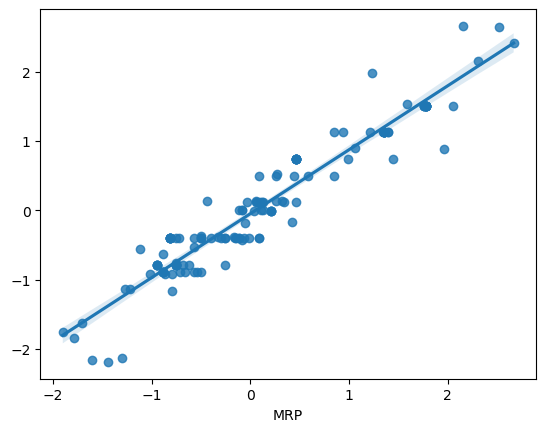

In [2086]:
sns.regplot(y_test, y_pred)

In [2087]:
from sklearn.svm import SVR

In [2088]:
svr = SVR()

In [2089]:
svr.fit(X_train, y_train)

SVR()

In [2090]:
yhat = svr.predict(X_test)

<AxesSubplot:xlabel='MRP'>

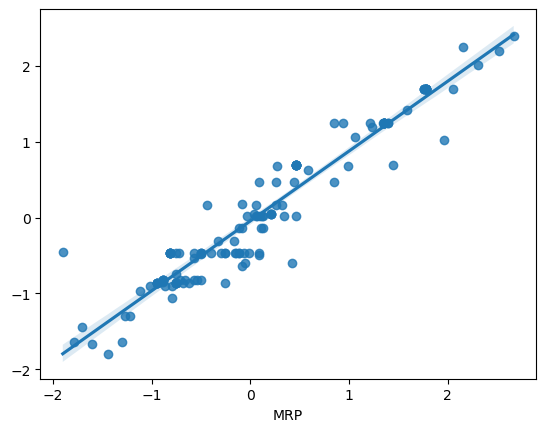

In [2091]:
sns.regplot(y_test, yhat)

In [2092]:
r2_score(y_test,yhat)

0.9195820844580905

In [2093]:
res=svr.predict(df_sample)

In [2094]:
res.reshape(-1,1)

array([[0.92013028]])

In [2095]:
res=y_scaler.inverse_transform(res.reshape(-1,1))

In [2096]:
math.exp(res)

115020.84746714169

In [1956]:
pickle.dump(svr,open('model.sav', 'wb'))

In [2271]:
pickle.dump(scaler, open('scaler.sav', 'wb'))

In [1966]:
pickle.dump(y_scaler, open('y_scaler.sav', 'wb'))

In [1967]:
pickle.dump(encode_os, open('encode_os.sav', 'wb'))

In [2237]:
pickle.dump(reg, open('finalized_model.sav', 'wb'))

In [2238]:
model = pickle.load(open('finalized_model.sav', 'rb'))

In [2245]:
out = model.predict(df_sample)

In [2246]:
out = y_scaler.inverse_transform(out)

In [2247]:
math.exp(out)

58196.82352459111

In [2272]:
scal = pickle.load(open('scaler.sav', 'rb'))

In [2283]:
scal.transform(df_sample[scaled_features].values)

array([[0.5       , 0.16666667, 1.        , 0.        , 0.        ,
        0.        , 0.5       , 0.01626016]])